### Classification with MNIST Dataset and LeNet-5 network
This script sets up a LeNet-style network to classify digits from the MNIST dataset.

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


Use a Keras utility function to load the MNIST dataset.  We select only zeros and ones to do binary classification.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

Resize the images to vectors and convert their datatype and range.

In [3]:
x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train*2.-1.
x_test = x_test*2.-1.

Build a binary linear classifier model.

In [4]:
model = Sequential()
model.add(Conv2D(50,5,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(20,5,padding='valid',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 50)        1300      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 20)          25020     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               64200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total para

Set up the model to optimize the binary crossentropy loss using stochastic gradient descent.

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Optimize the model over the training data.

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s - loss: 0.7813 - acc: 0.7748 - val_loss: 0.2067 - val_acc: 0.9386
Epoch 2/20
60000/60000 [==============================] - 7s - loss: 0.1789 - acc: 0.9473 - val_loss: 0.1250 - val_acc: 0.9640
Epoch 3/20
60000/60000 [==============================] - 7s - loss: 0.1254 - acc: 0.9630 - val_loss: 0.0946 - val_acc: 0.9721
Epoch 4/20
60000/60000 [==============================] - 7s - loss: 0.1001 - acc: 0.9702 - val_loss: 0.0805 - val_acc: 0.9755
Epoch 5/20
60000/60000 [==============================] - 7s - loss: 0.0855 - acc: 0.9741 - val_loss: 0.0667 - val_acc: 0.9797
Epoch 6/20
60000/60000 [==============================] - 7s - loss: 0.0745 - acc: 0.9776 - val_loss: 0.0615 - val_acc: 0.9815
Epoch 7/20
60000/60000 [==============================] - 7s - loss: 0.0670 - acc: 0.9797 - val_loss: 0.0638 - val_acc: 0.9797
Epoch 8/20
60000/60000 [==============================] - 7s 

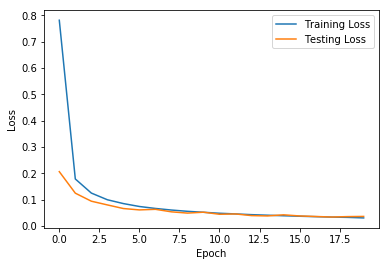

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

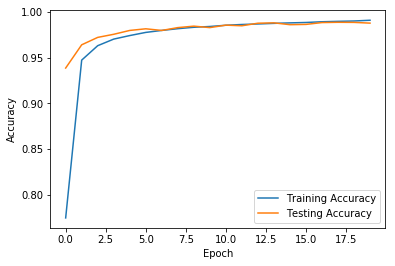

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()